In [31]:
import pathlib
import matplotlib.pyplot as plt
import cv2
import sys
sys.path.append('/home/alalbiol/Programacion/Mammography/Yolo8Mamo/datasets')

from annotation_utils import read_annotation_image


In [2]:
yolo_path = pathlib.Path('/tmp/ddsm_yolo/training')

images = list(yolo_path.glob('**/*.png'))
print(len(images))

9932


In [3]:
def get_label_path(image_path):
    return pathlib.Path(str(image_path).replace("images",'labels').replace('.png', '.txt'))

In [4]:
labels = [get_label_path(image) for image in images]

In [5]:
def get_label(label_path):
    boxes = []
    with open(label_path, 'r') as f:
        for line in f:
            fields = line.strip().split(" ")
            data = {}
            data['class'] = int(fields[0])
            data['x'] = float(fields[1])
            data['y'] = float(fields[2])
            data['w'] = float(fields[3])
            data['h'] = float(fields[4])
            boxes.append(data)
    return boxes
            

In [6]:
get_label(labels[0])

[{'class': 1,
  'x': 0.2341628959276018,
  'y': 0.44642857142857145,
  'w': 0.04093608597285067,
  'h': 0.030391483516483516}]

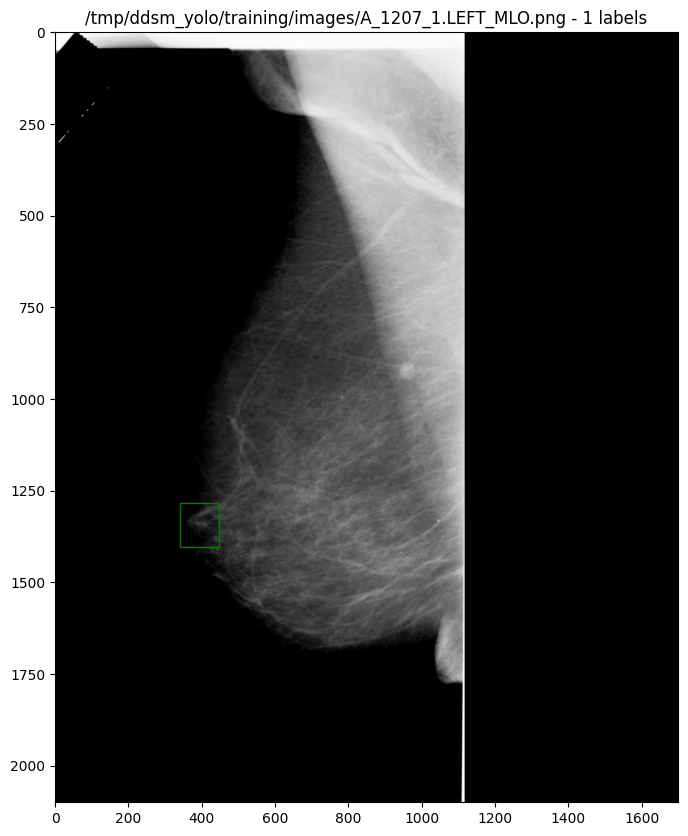

In [46]:
from matplotlib.patches import Rectangle
def show_image(image_path):
    label_path = get_label_path(image_path)
    labels = get_label(label_path)
    
    img = cv2.imread(str(image_path))
    H, W, _ = img.shape
    
    fig = plt.figure(figsize=(20, 10))
    plt.imshow(img)
    ax = plt.gca()  # Get the current axes
    
    if len(labels) == 0:
        plt.title(f"{image_path.name} - No labels")
    else:
        plt.title(f"{image_path} - {len(labels)} labels")
    for label in labels:
        x_center = int(label['x'] * W)
        y_center = int(label['y'] * H)
        w = int(label['w'] * W)
        h = int(label['h'] * H)
        color = 'r' if label['class'] == 2 else 'g'
        
        rect = Rectangle((x_center - w/2, y_center - h/2), w, h, linewidth=1, edgecolor=color, facecolor='none')
        ax.add_patch(rect)  # Add the rectangle patch to the axes
    
    plt.show()

show_image(images[31])
    

In [25]:
images[3]

id = images[3].stem
print(id)

B_3161_1.RIGHT_CC


/home/alalbiol/Data/mamo/DDSM_png/benign_without_callbacks/benign_without_callback_01/case3161/B_3161_1.RIGHT_CC.png


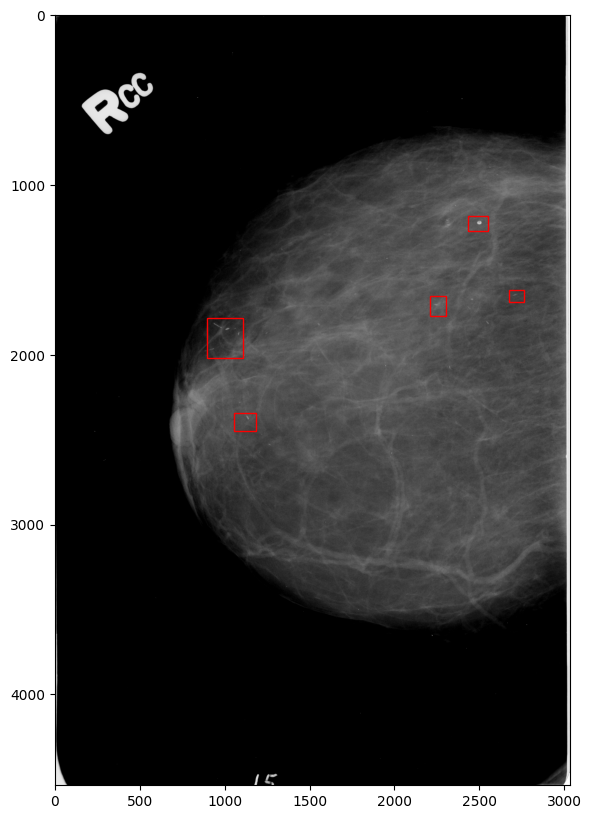

In [41]:
def show_original(image_path):
    id = image_path.stem

    orig_ddsm_path = pathlib.Path('/home/alalbiol/Data/mamo/DDSM_png')

    all_orig_images = list(orig_ddsm_path.glob('**/*.png'))
    orig_image = [img for img in all_orig_images if id in str(img)][0]
    
    overlay = str(orig_image).replace('.png', '.OVERLAY')
    print(orig_image)
    
    abn = read_annotation_image(overlay)
    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.imread(str(orig_image)))
    for a in abn:
        xmin = a['bounding_box'][0]
        ymin = a['bounding_box'][1]
        xmax = a['bounding_box'][2]
        ymax = a['bounding_box'][3]
        xcenter = a['bounding_box'][4]
        ycenter = a['bounding_box'][5]
        width = a['bounding_box'][6]
        height = a['bounding_box'][7]
        
        r = Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')
        plt.gca().add_patch(r)
   

show_original(images[3])

In [27]:

print(orig_mage)

/home/alalbiol/Data/mamo/DDSM_png/benign_without_callbacks/benign_without_callback_01/case3161/B_3161_1.RIGHT_CC.png
